## การจัดกลุ่มข้อมูล (K-Means) : Unsupervised Learning

เป็นการจัดกลุ่มข้อมูล (Cluster) โดยไม่ทราบผลเฉลย (Label/Answer/Target)

### Step 1: การจัดเตรียมข้อมูล

In [1]:
import numpy as np

# ข้อมูลอาร์เรย์ 2 มิติ (2D)
data = np.array([[8, 1], [12, 1], [42, 1], [10, 2], [39, 2], [26, 5], [23, 6], [30, 6], [25, 8]])

data

array([[ 8,  1],
       [12,  1],
       [42,  1],
       [10,  2],
       [39,  2],
       [26,  5],
       [23,  6],
       [30,  6],
       [25,  8]])

### Step 2: Data Visualization

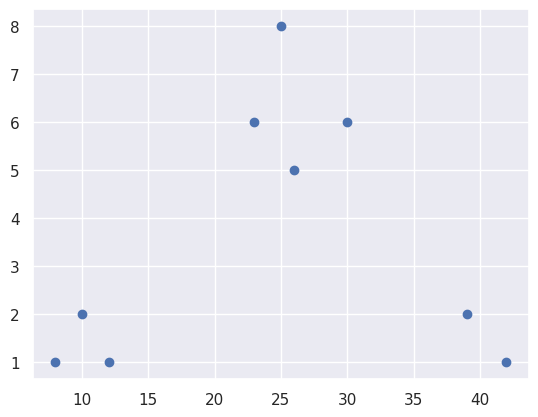

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.scatter(data[:, 0], data[:, 1]) # ข้อมูลคอลัมน์ 0, คอลัมน์ 1: data[:, 0], data[:, 1]

### Step 3: สร้างแบบจำลอง (Model)

In [5]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, n_init='auto')   # สร้างแบบจำลองที่ต้องการแบ่งข้อมูลเป็น 3 กลุ่ม: 3
model.fit(data)                                  # ส่งข้อมูลเข้าไปเรียนรู้ในแบบจำลอง: data

KMeans(n_clusters=3)

In [7]:
y_predict = model.predict(data)                  # พยากรณ์แบบจำลองด้วยข้อมูล: data
y_predict

array([1, 1, 2, 1, 2, 0, 0, 0, 0], dtype=int32)

### Step 4: Data Visualization

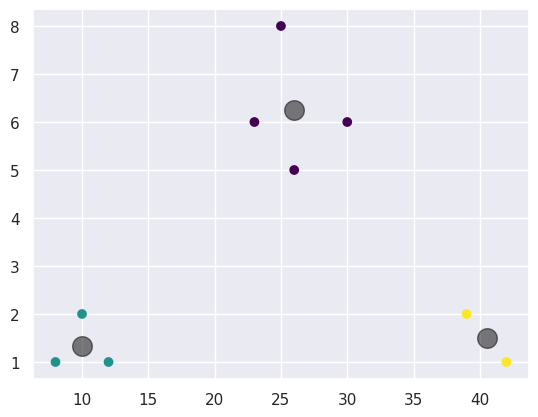

In [8]:
plt.scatter(data[:, 0], data[:, 1], c=y_predict, cmap='viridis') # แสดงจุดแยกตามสีของ กลุ่ม y_predict: y_predict

centers = model.cluster_centers_        # ค่ากลางของแต่ละ Cluster: model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) # แสดงค่ากลางของแต่ละ Cluster

### Step 5: การหาค่า K ที่เหมาะสมจากจุดหักศอก (Elbow method)

In [9]:
from sklearn.cluster import KMeans

# ข้อมูลอาร์เรย์ 2 มิติ (2D)
data = np.array([[8, 1], [12, 1], [42, 1], [10, 2], [39, 2], [26, 5], [23, 6], [30, 6], [25, 8]])

data


array([[ 8,  1],
       [12,  1],
       [42,  1],
       [10,  2],
       [39,  2],
       [26,  5],
       [23,  6],
       [30,  6],
       [25,  8]])

In [10]:
inertias = []                                 # ใช้เก็บค่าผลรวมของระยะห่างจากทุกจุดไปยังจุดศูนย์กลาง Cluster

for i in range(1, 9):                         # วนรอบเพื่อสร้าง Cluster ตั้งแต่ 1 - 8 กลุ่ม
  model = KMeans(n_clusters=i, n_init='auto') # สร้างแบบจำลอง
  model.fit(data)                                # ทำการเรียนรู้จากข้อมูล: data
  inertias.append(model.inertia_)             # ทำการจัดเก็บค่าผลลัพธ์ เพื่อนำไปหาค่า K ที่เหมาะสม

### Step 6: Data Visualization

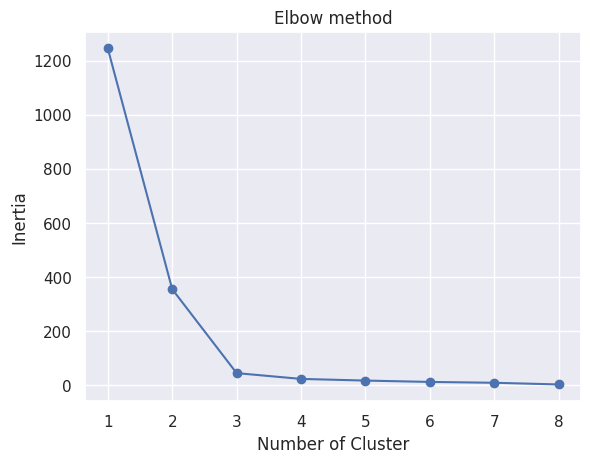

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.plot(range(1, 9), inertias, marker='o') # แสดงค่าผลรวมของระยะห่างจากทุกจุดไปยังจุดศูนย์กลาง Cluster ที่ถูกเก็บไว้ในอาร์เรย์ของผลลัพธ์: inertias
plt.title('Elbow method')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.show()